In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

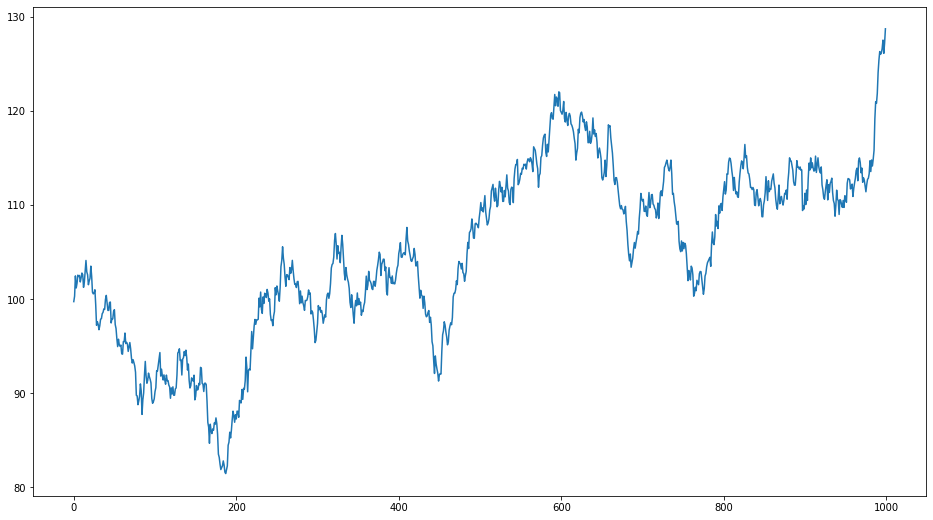

In [2]:
np.random.seed(2018)
drift = 100
r1 = np.random.normal(0, 1, 1000)
s1 = pd.Series(np.cumsum(r1), name='s1') + drift
s1.plot()
plt.show()

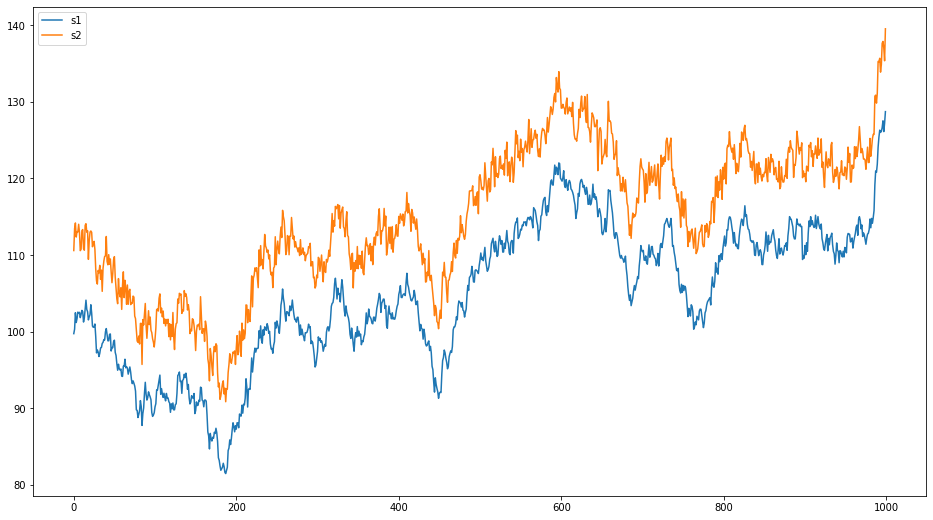

In [3]:
offset = 10
noise = np.random.normal(0, 1, 1000)
s2 = s1 + offset + noise
s2.name = 's2'
pd.concat([s1, s2], axis=1).plot()
plt.show()

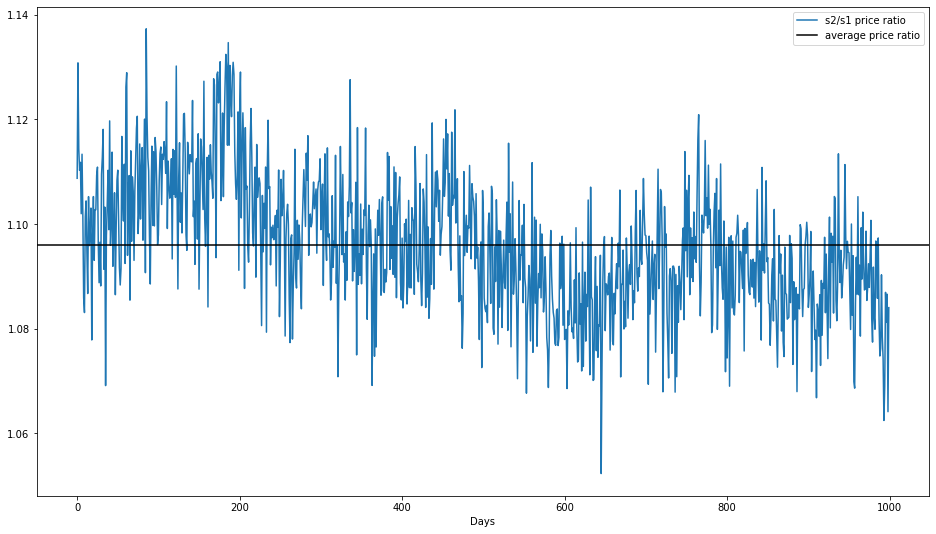

In [5]:
price_ratio = s2/s1
price_ratio.plot()
plt.axhline(price_ratio.mean(), color='black')
plt.xlabel('Days')
plt.legend(['s2/s1 price ratio', 'average price ratio'])
plt.show()

# Linear regression

In [6]:
lr = LinearRegression()
lr.fit(s1.values.reshape(-1,1), s2.values.reshape(-1,1))

LinearRegression()

In [7]:
hedge_ratio = lr.coef_[0][0]
intercept = lr.intercept_[0]

print(f"hedge ratio from regression is {hedge_ratio:.4f}, intercept is {intercept:.4f}")

hedge ratio from regression is 1.0022, intercept is 9.7530


# Spread

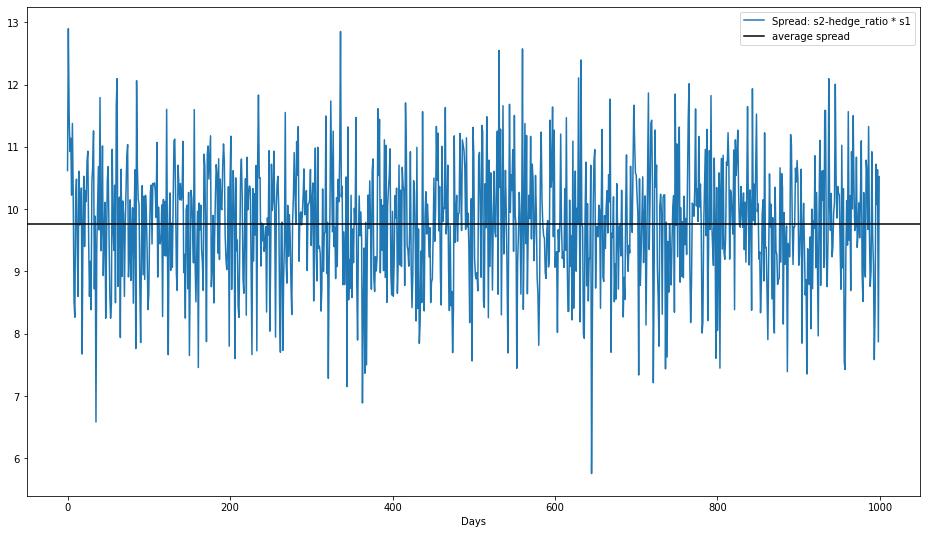

In [8]:
spread = s2 - s1 * hedge_ratio
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.xlabel('Days')
plt.legend(['Spread: s2-hedge_ratio * s1', 'average spread'])
plt.show()

# Check for stationary spread using Augmented Dickey Fuller Test

In [13]:
def is_spread_stationary(spread, p_level=.05):
    adf_result = adfuller(spread, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    
    pvalue = adf_result[1]
    
    print(f"pvalue {pvalue:.4f}")
    if pvalue <= p_level:
        print(f"pvalue is <= {p_level}, assume spread is stationary")
        return True
    else:
        print(f"pvalue is > {p_level}, assume spread is not stationary")
        return False

In [14]:
is_spread_stationary(spread)

pvalue 0.0000
pvalue is <= 0.05, assume spread is stationary


True

# Johansen test